# Data cleaning

In [208]:
# Importing libraries
import pandas as pd
import numpy as np

In [209]:
# Importing the datasets
games = pd.read_csv('Datasets/metacritic_game_info.csv')
comments = pd.read_csv('Datasets/metacritic_game_user_comments.csv')

## Games

In [210]:
# Taking a look at the dataset and dropping this column
games.drop('Unnamed: 0', axis = 1, inplace = True)
games

,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99,9.1,1 Player
1,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98,7.4,1-2
2,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98,7.5,1 Player
3,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98,8.6,1-2
4,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,Xbox360,98,7.9,1 Player
...,...,...,...,...,...,...,...,...
4995,Donut County,2018,BenEsposito,Action Adventure;General,PC,77,8.1,No Online Multiplayer
4996,MotorStorm: Apocalypse,2011,EvolutionStudios,Driving;Racing;Simulation;Rally / Offroad;Rall...,PlayStation3,77,7.7,4 Online
4997,The Last Guy,2008,SCEJapanStudio,Action Adventure;Sci-Fi;Sci-Fi;General,PlayStation3,77,6.8,1 Player
4998,Valiant Hearts: The Great War,2014,UbisoftMontpellier,Platformer;2D;Action;Platformer;2D,PlayStation4,77,8.4,not specified


In [211]:
# Checking for nulls
print(games.isna().sum())  # got 7

# Checking which are these 7 rows for curiosity and if I can save them or not
games[games.isnull().any(axis = 1)]

Title            0
Year             0
Publisher        0
Genre            0
Platform         0
Metascore        0
Avg_Userscore    0
No_Players       7
dtype: int64


,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
663,Shenmue II,2001,SegaAM2,Action Adventure;Modern,Dreamcast,88,9.1,NaN
1171,Lunar 2: Eternal Blue Complete,2000,GameArts,Role-Playing;Console-style RPG,PlayStation,86,8.9,NaN
1952,Ultra Street Fighter IV,2014,Capcom,Fighting;3D;Action;Fighting;2D;3D,Xbox360,84,6.8,NaN
2051,Ultra Street Fighter IV,2014,Capcom,Fighting;3D;Action;Fighting;2D;3D,PlayStation3,83,7.5,NaN
3244,Wreckfest,2018,Bugbear,Driving;General;General;Racing;Arcade;Automobile,PC,81,8.3,NaN
4433,ONRUSH,2018,Codemasters,Racing;Arcade;Automobile,XboxOne,78,6.6,NaN
4441,Donkey Kong Country,2003,RareLtd.,Action;Platformer;2D,GameBoyAdvance,78,8.9,NaN


In [212]:
# Filling these 7 rows with 'not specified' instead of dropping
games.fillna('not specified', inplace = True)

# Checking again for nulls
print(games.isna().sum())  # all good

Title            0
Year             0
Publisher        0
Genre            0
Platform         0
Metascore        0
Avg_Userscore    0
No_Players       0
dtype: int64


In [213]:
# Checking the data types
print(games.dtypes, '\n')  # everything is 'object'. Will change this

# Converting all columns but those 3 to strings
for i in games.columns:
    if i not in ['Year', 'Metascore', 'Avg_Userscore']:
        games[i] = games[i].astype('string')


# List comprehension version to convert all columns to strings except those 3
## Doesn't work cuz I haven't found a way to 'save' or assign games[i] = games[i]... like in the foor loop above
#[games[i].astype('string') for i in games.columns if i not in ['Year', 'Metascore', 'Avg_Userscore']]

Title            object
Year             object
Publisher        object
Genre            object
Platform         object
Metascore        object
Avg_Userscore    object
No_Players       object
dtype: object 



In [214]:
# Checking the types again
print(games.dtypes)  # all good

Title            string
Year             object
Publisher        string
Genre            string
Platform         string
Metascore        object
Avg_Userscore    object
No_Players       string
dtype: object


In [215]:
# Checking the year column's values. Want to convert to int
games['Year'].unique()

array(['1998', '2000', '2008', '1999', '2007', '2010', '2014', '2013',
       '2017', '2001', '2002', '2004', '2015', '1997', '2009', '2005',
       '2011', '2006', '2003', '2018', '1996', '2012', '2016',
       'not specified', '1995'], dtype=object)

In [216]:
# Checking what's in here
games[games['Year'] == 'not specified']  # gonna drop all this useless information

,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
808,Error 503 Service Unavailable,not specified,not specified,no genre,not specified,not specified,not specified,not specified
1360,Bad Request,not specified,not specified,no genre,not specified,not specified,not specified,not specified
2122,This page isn’t working,not specified,not specified,no genre,not specified,not specified,not specified,not specified
2123,This page isn’t working,not specified,not specified,no genre,not specified,not specified,not specified,not specified
2124,This page isn’t working,not specified,not specified,no genre,not specified,not specified,not specified,not specified
2125,This page isn’t working,not specified,not specified,no genre,not specified,not specified,not specified,not specified
2126,This page isn’t working,not specified,not specified,no genre,not specified,not specified,not specified,not specified
2127,This page isn’t working,not specified,not specified,no genre,not specified,not specified,not specified,not specified
2977,page not found,not specified,not specified,no genre,not specified,not specified,not specified,not specified
4408,Bad Request,not specified,not specified,no genre,not specified,not specified,not specified,not specified


In [217]:
# Dropping those rows mentioned above
games.drop(games[games['Year'] == 'not specified'].index, inplace = True)

# Checking if it worked
games[games['Year'] == 'not specified']  # all good

,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players


In [218]:
# Checking Year values again
games['Year'].unique()  # seems ready to be converted to int

array(['1998', '2000', '2008', '1999', '2007', '2010', '2014', '2013',
       '2017', '2001', '2002', '2004', '2015', '1997', '2009', '2005',
       '2011', '2006', '2003', '2018', '1996', '2012', '2016', '1995'],
      dtype=object)

In [219]:
# Checking Metascore values
games['Metascore'].unique()  # seems ready to be converted to int as well

array(['99', '98', '97', '96', '95', '94', '93', '92', '91', '90', '89',
       '88', '87', '86', '85', '84', '83', '82', '81', '80', '79', '78',
       '77'], dtype=object)

In [220]:
for i in games.columns:
    if i in ['Year', 'Metascore']:
        games[i] = games[i].astype(int)

# Seeing if it worked
games.dtypes  # all good

Title            string
Year              int64
Publisher        string
Genre            string
Platform         string
Metascore         int64
Avg_Userscore    object
No_Players       string
dtype: object

In [221]:
# Checking the avg_userscore values
games['Avg_Userscore'].unique()

array(['9.1', '7.4', '7.5', '8.6', '7.9', '9.0', '7.8', '8.3', '6.2',
       '8.5', '8.9', '9.2', '6.4', '7.7', '8.2', '9.3', '8.8', '8.7',
       '6.8', '8.4', '7.0', '8.1', '7.3', '8.0', '5.9', '5.6', '6.5',
       '7.6', '3.4', '5.0', '6.7', '5.8', '6.6', '4.5', '6.3', '7.2',
       '6.9', '5.5', 'tbd', '6.1', '7.1', '5.7', '5.2', '6.0', '4.1',
       '3.2', 'not specified', '4.2', '4.9', '3.1', '5.1', '5.4', '4.3',
       '4.4', '4.7', '4.8', '1.6', '5.3', '3.3', '3.5', '3.7', '3.8',
       '3.6', '2.7', '1.7', '2.1', '2.8', '4.6', '4.0', '2.4'],
      dtype=object)

In [222]:
games[games['Avg_Userscore'] == 'not specified']  # 1 game - could just drop, I guess

games[games['Avg_Userscore'] == 'tbd'].sort_values('Year')  # 75 games - not sure if I drop or fill with smth

# Making a drop list
drop_lst = games[games['Avg_Userscore'] == 'not specified'].index.tolist() + \
games[games['Avg_Userscore'] == 'tbd'].sort_values('Year').index.tolist()

len(drop_lst)  # 76. All good

76

In [223]:
# Dropping those values
games.drop(drop_lst, inplace = True)

In [224]:
# Checking if it worked. All good
games[games['Avg_Userscore'] == 'not specified']
games[games['Avg_Userscore'] == 'tbd'].sort_values('Year')

,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players


In [225]:
# Checking the values again
games['Avg_Userscore'].unique()  # seems ready to be converted to float

array(['9.1', '7.4', '7.5', '8.6', '7.9', '9.0', '7.8', '8.3', '6.2',
       '8.5', '8.9', '9.2', '6.4', '7.7', '8.2', '9.3', '8.8', '8.7',
       '6.8', '8.4', '7.0', '8.1', '7.3', '8.0', '5.9', '5.6', '6.5',
       '7.6', '3.4', '5.0', '6.7', '5.8', '6.6', '4.5', '6.3', '7.2',
       '6.9', '5.5', '6.1', '7.1', '5.7', '5.2', '6.0', '4.1', '3.2',
       '4.2', '4.9', '3.1', '5.1', '5.4', '4.3', '4.4', '4.7', '4.8',
       '1.6', '5.3', '3.3', '3.5', '3.7', '3.8', '3.6', '2.7', '1.7',
       '2.1', '2.8', '4.6', '4.0', '2.4'], dtype=object)

In [226]:
# Converting to float
games['Avg_Userscore'] = games['Avg_Userscore'].astype(float)

# Checking if it worked
games.dtypes  # all good

Title             string
Year               int64
Publisher         string
Genre             string
Platform          string
Metascore          int64
Avg_Userscore    float64
No_Players        string
dtype: object

In [227]:
games_scores = games.groupby('Title', as_index = False).agg(
    {'Metascore': 'mean', 
     'Avg_Userscore': 'mean'}).sort_values('Avg_Userscore', ascending = False).reset_index(drop = True)


games_scores

,Title,Metascore,Avg_Userscore
0,Bloodborne: The Old Hunters,87.000000,9.300000
1,The Witcher 3: Wild Hunt,92.000000,9.233333
2,Planescape: Torment,91.000000,9.200000
3,Half-Life 2: Episode Two,90.000000,9.200000
4,Resident Evil,91.000000,9.200000
...,...,...,...
3382,FIFA 18,82.666667,3.033333
3383,Super Rude Bear Resurrection,78.000000,2.800000
3384,The Inner World,77.000000,2.400000
3385,Company of Heroes 2,80.000000,2.100000


In [228]:
games_scores['Metascore'].unique()
games_scores['Avg_Userscore'].unique()

array([9.3       , 9.23333333, 9.2       , 9.13333333, 9.1       ,
       9.05      , 9.        , 8.95      , 8.9       , 8.86666667,
       8.85      , 8.85      , 8.83333333, 8.8       , 8.8       ,
       8.76666667, 8.76666667, 8.75      , 8.73333333, 8.73333333,
       8.725     , 8.7       , 8.7       , 8.66666667, 8.65      ,
       8.65      , 8.63333333, 8.6       , 8.6       , 8.575     ,
       8.56666667, 8.56666667, 8.55      , 8.53333333, 8.525     ,
       8.525     , 8.52      , 8.5       , 8.5       , 8.475     ,
       8.46666667, 8.45      , 8.43333333, 8.43333333, 8.43333333,
       8.425     , 8.425     , 8.4       , 8.4       , 8.38      ,
       8.375     , 8.35      , 8.35      , 8.33333333, 8.3       ,
       8.3       , 8.275     , 8.26666667, 8.26666667, 8.26      ,
       8.25      , 8.23333333, 8.23333333, 8.2       , 8.2       ,
       8.175     , 8.16666667, 8.15      , 8.15      , 8.13333333,
       8.13333333, 8.125     , 8.12      , 8.1       , 8.1    

In [229]:
# Converting the Metascore to same scale as avg_userscore
games_scores['Metascore'] = games_scores['Metascore'].apply(lambda x: x / 10)

# Fixing the scores to have just 1 decimal place
games_scores['Metascore'] = games_scores['Metascore'].apply(lambda x: round(x, 1))
games_scores['Avg_Userscore'] = games_scores['Avg_Userscore'].apply(lambda x: round(x, 1))

In [230]:
# Checking the results
games_scores  # all good

,Title,Metascore,Avg_Userscore
0,Bloodborne: The Old Hunters,8.7,9.3
1,The Witcher 3: Wild Hunt,9.2,9.2
2,Planescape: Torment,9.1,9.2
3,Half-Life 2: Episode Two,9.0,9.2
4,Resident Evil,9.1,9.2
...,...,...,...
3382,FIFA 18,8.3,3.0
3383,Super Rude Bear Resurrection,7.8,2.8
3384,The Inner World,7.7,2.4
3385,Company of Heroes 2,8.0,2.1


In [231]:
# Creating a column with the score difference
games_scores['Score_Difference'] = abs(round(games_scores['Metascore'] - games_scores['Avg_Userscore'], 1))

games_scores[games_scores['Score_Difference'] == games_scores['Score_Difference'].max()]  # crazy score difference :o

,Title,Metascore,Avg_Userscore,Score_Difference
3386,NBA 2K18,8.2,1.6,6.6


In [232]:
# Final score groupby
games_scores

,Title,Metascore,Avg_Userscore,Score_Difference
0,Bloodborne: The Old Hunters,8.7,9.3,0.6
1,The Witcher 3: Wild Hunt,9.2,9.2,0.0
2,Planescape: Torment,9.1,9.2,0.1
3,Half-Life 2: Episode Two,9.0,9.2,0.2
4,Resident Evil,9.1,9.2,0.1
...,...,...,...,...
3382,FIFA 18,8.3,3.0,5.3
3383,Super Rude Bear Resurrection,7.8,2.8,5.0
3384,The Inner World,7.7,2.4,5.3
3385,Company of Heroes 2,8.0,2.1,5.9


In [233]:
# Exporting scores to csv
games_scores.to_csv('games_scores_grouped.csv')

In [234]:
# Final dataframe
games

,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99,9.1,1 Player
1,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98,7.4,1-2
2,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98,7.5,1 Player
3,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98,8.6,1-2
4,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,Xbox360,98,7.9,1 Player
...,...,...,...,...,...,...,...,...
4995,Donut County,2018,BenEsposito,Action Adventure;General,PC,77,8.1,No Online Multiplayer
4996,MotorStorm: Apocalypse,2011,EvolutionStudios,Driving;Racing;Simulation;Rally / Offroad;Rall...,PlayStation3,77,7.7,4 Online
4997,The Last Guy,2008,SCEJapanStudio,Action Adventure;Sci-Fi;Sci-Fi;General,PlayStation3,77,6.8,1 Player
4998,Valiant Hearts: The Great War,2014,UbisoftMontpellier,Platformer;2D;Action;Platformer;2D,PlayStation4,77,8.4,not specified


In [235]:
# Exporting final dataframe cleaned
games.to_csv('games_info_clean.csv')

## Comments

In [236]:
# Try to see, at a later point, if we can have like a count of words or something for each game
# to see the most used words and help ux/ui better market stuff?
## think this can do be later on with the .most_common(xxx) method of the Naive Bayes Classifier?

In [237]:
# Taking a look at the dataset and dropping this column
comments.drop('Unnamed: 0', axis = 1, inplace = True)
comments

,Title,Platform,Userscore,Comment,Username
0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA
...,...,...,...,...,...
283978,Etrian Odyssey Untold: The Millennium Girl,3DS,7,"Extremely similar to EO:4, which obviously isn...",RileyWRussell
283979,Etrian Odyssey Untold: The Millennium Girl,3DS,0,Typical overrated Atlus trash. A game i should...,TemplarGR
283980,Etrian Odyssey Untold: The Millennium Girl,3DS,9,While I find the story mode to have annoying c...,midipon
283981,Etrian Odyssey Untold: The Millennium Girl,3DS,8,"Pretty good, but it certainly lacks the visual...",night4


In [238]:
# Checking for nulls
print(comments.isna().sum(), '\n')  # 26

# Dropping the nulls
comments.dropna(inplace = True)

# Checking again. All good
print(comments.isna().sum())

Title         0
Platform      0
Userscore     0
Comment      23
Username      3
dtype: int64 

Title        0
Platform     0
Userscore    0
Comment      0
Username     0
dtype: int64


In [239]:
# Checking the data types
print(comments.dtypes, '\n')

# Converting the 'objects' to strings
for i in comments.columns:
    if i != 'Userscore':
        comments[i] = comments[i].astype('string')

# Checking again. All good
print(comments.dtypes)
comments

Title        object
Platform     object
Userscore     int64
Comment      object
Username     object
dtype: object 

Title        string
Platform     string
Userscore     int64
Comment      string
Username     string
dtype: object


,Title,Platform,Userscore,Comment,Username
0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA
...,...,...,...,...,...
283978,Etrian Odyssey Untold: The Millennium Girl,3DS,7,"Extremely similar to EO:4, which obviously isn...",RileyWRussell
283979,Etrian Odyssey Untold: The Millennium Girl,3DS,0,Typical overrated Atlus trash. A game i should...,TemplarGR
283980,Etrian Odyssey Untold: The Millennium Girl,3DS,9,While I find the story mode to have annoying c...,midipon
283981,Etrian Odyssey Untold: The Millennium Girl,3DS,8,"Pretty good, but it certainly lacks the visual...",night4


In [240]:
# Checking for duplicated records
print(comments.duplicated().sum())

# Checking some of these rows to make sure
comments[comments.duplicated() == True]

1756


,Title,Platform,Userscore,Comment,Username
1013,Grand Theft Auto IV,PlayStation3,10,Best Game Ever,JamesK.
1017,Grand Theft Auto IV,PlayStation3,10,Best Game Ever,JamesK.
1020,Grand Theft Auto IV,PlayStation3,10,Best Game Ever,JamesK.
1061,Grand Theft Auto IV,PlayStation3,10,Best Game Ever,JamesK.
1069,Grand Theft Auto IV,PlayStation3,1,This game has poor graphics for a PS3 game an...,FredC.
...,...,...,...,...,...
269499,Red Orchestra: Ostfront 41-45,PC,10,The best game ever!,SebastianB
269533,Red Orchestra: Ostfront 41-45,PC,10,The best game ever!,SebastianB
269534,Red Orchestra: Ostfront 41-45,PC,10,The best game ever!,SebastianB
281419,Madden NFL 07,Xbox360,10,Great game!,JonL.


In [241]:
# Dropping the duplicated records
comments.drop_duplicates(inplace = True)

# Checking for duplicated records again
print(comments.duplicated().sum())  # all good

0


In [242]:
# Doing a groupby to get the avg userscore for games that were commented and rated
avg_cmt_user_score = comments.groupby('Title', as_index = False).agg(
    {'Userscore': 'mean'}).sort_values('Userscore', ascending = False).reset_index(drop = True)

avg_cmt_user_score['Userscore'] = avg_cmt_user_score['Userscore'].apply(lambda x: round(x, 1))

avg_cmt_user_score

,Title,Userscore
0,Art Style: PiCTOBiTS,10.0
1,B-17 Flying Fortress: The Mighty 8th,10.0
2,VIDEOBALL,10.0
3,Etrian Odyssey II: Heroes of Lagaard,10.0
4,Dark Age of Camelot: Catacombs,10.0
...,...,...
2320,FIFA 18,2.3
2321,EverQuest: Gates of Discord,2.0
2322,Quake III Revolution,2.0
2323,NBA 2K18,1.7


In [245]:
# Exporting the groupby
avg_cmt_user_score.to_csv('avg_commented_userscore.csv')

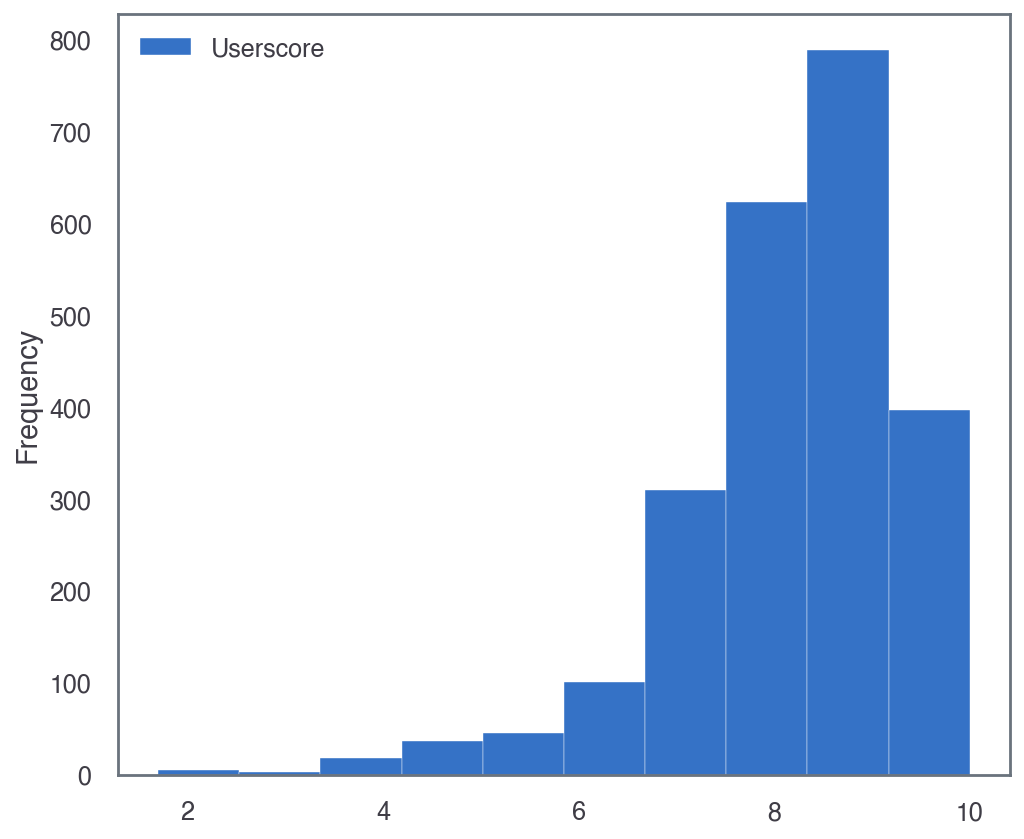

In [243]:
# Checking the userscores distribution
avg_cmt_user_score.plot(kind = 'hist');

In [246]:
# Final dataframe
comments

,Title,Platform,Userscore,Comment,Username
0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA
...,...,...,...,...,...
283978,Etrian Odyssey Untold: The Millennium Girl,3DS,7,"Extremely similar to EO:4, which obviously isn...",RileyWRussell
283979,Etrian Odyssey Untold: The Millennium Girl,3DS,0,Typical overrated Atlus trash. A game i should...,TemplarGR
283980,Etrian Odyssey Untold: The Millennium Girl,3DS,9,While I find the story mode to have annoying c...,midipon
283981,Etrian Odyssey Untold: The Millennium Girl,3DS,8,"Pretty good, but it certainly lacks the visual...",night4


In [247]:
# Exporting the cleaned dataframe
comments.to_csv('games_comments_cleaned.csv')